In [2]:
import matplotlib as mpl
print(mpl.colormaps())


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

Eigenvalues of H: [-2.46519033e-32+0.j -1.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j]


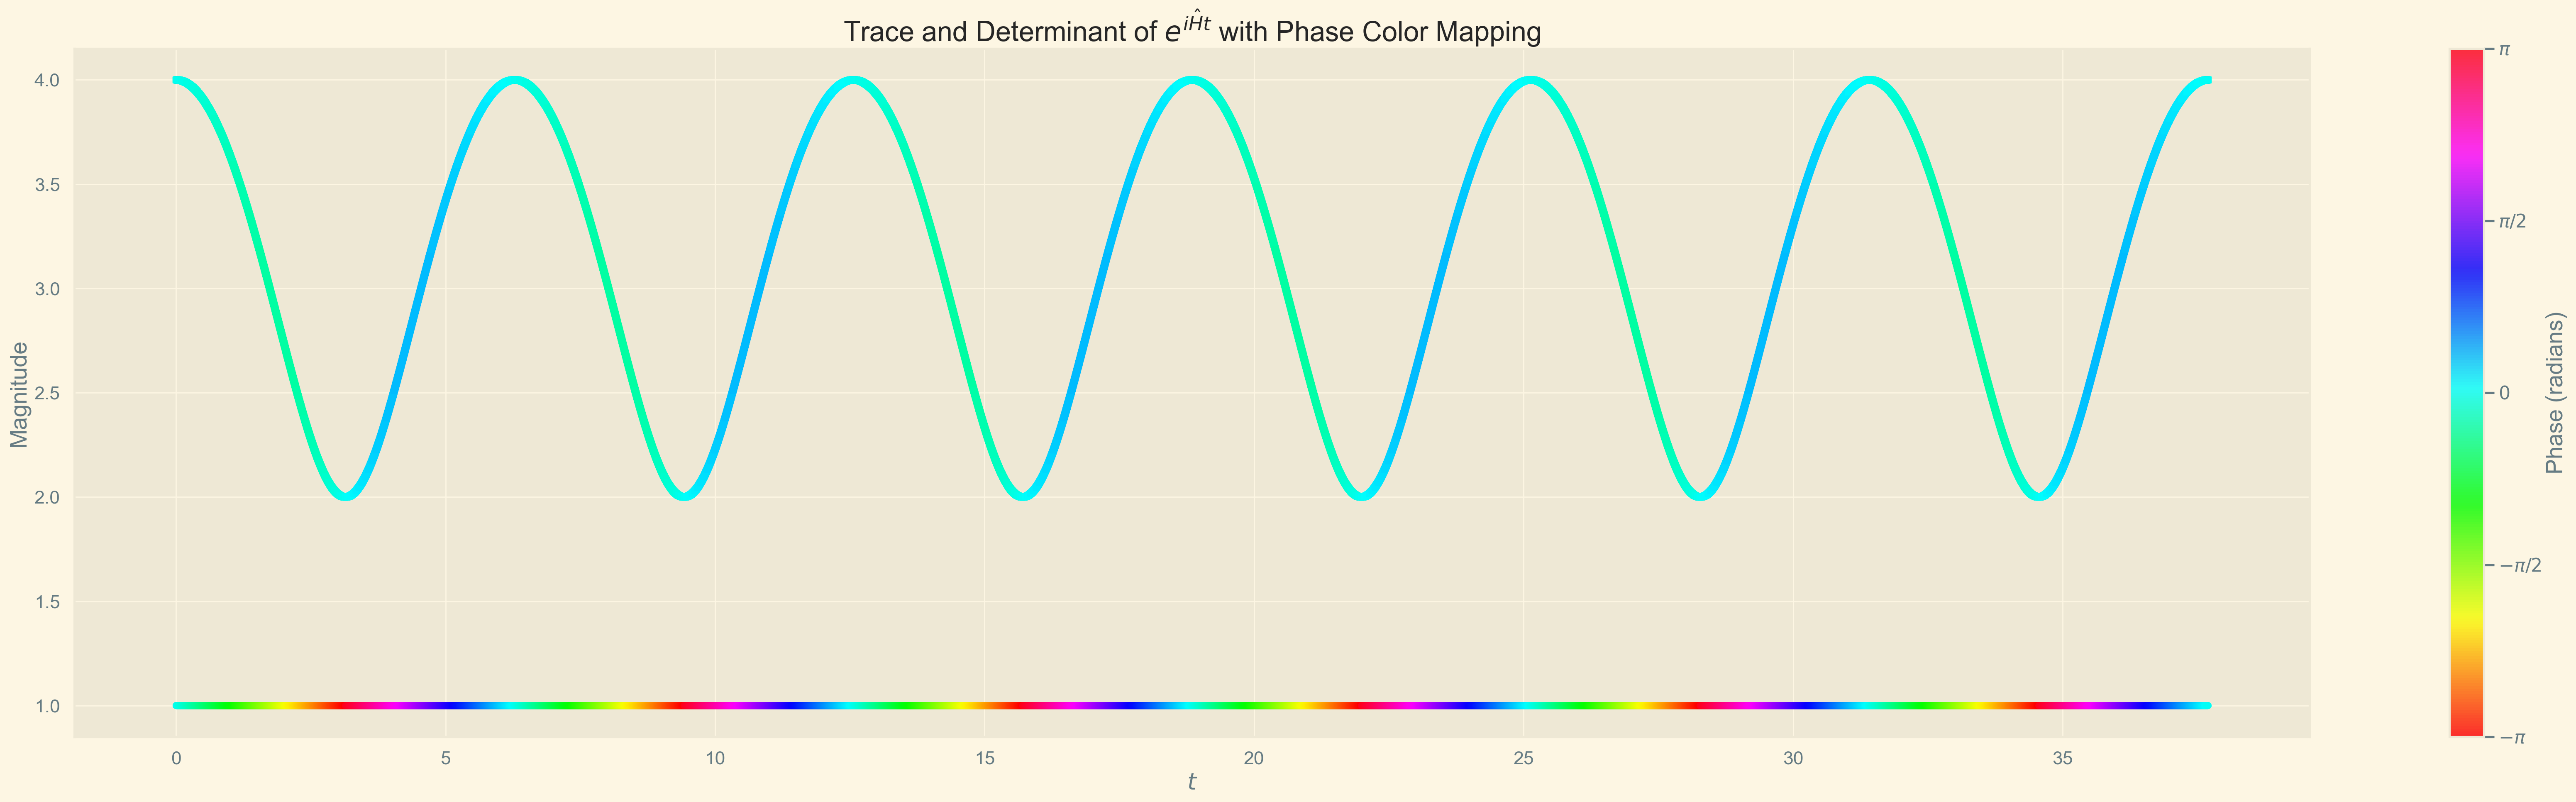

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.ticker as ticker

# Use the Solarized Light style for improved aesthetics.
plt.style.use('Solarize_Light2')
# Optionally, comment out the Seaborn theme if desired:
# sns.set_theme(style="whitegrid", context="talk")

# ================================
# Define a 4x4 Hamiltonian \hat{H} (using a block structure)
# ================================
H = np.array([
    [0,    0,    0, 0],
    [0, -0.5,  0.5, 0],
    [0,  0.5, -0.5, 0],
    [0,    0,    0, 0]
], dtype=np.complex128)

# Optionally, compute the eigenvalues to analyze periodicity:
eigs = np.linalg.eigvals(H)
print("Eigenvalues of H:", eigs)
period = 4 * np.pi  # reference period (unused in this version)

# ================================
# Define the range for t with higher resolution
# ================================
num_points = 50000  # increased resolution for smooth curves
t_values = np.linspace(0, 12 * np.pi, num_points)

# Prepare lists to store determinant and trace results.
det_values = []
trace_values = []

# Compute e^(i \hat{H} t) for each t and extract determinant and trace.
for t in t_values:
    M = expm(1j * t * H)
    det_values.append(np.linalg.det(M))
    trace_values.append(np.trace(M))

det_values   = np.array(det_values)
trace_values = np.array(trace_values)

# Compute magnitudes and phases.
det_mag   = np.abs(det_values)
det_phase = np.angle(det_values)
trace_mag   = np.abs(trace_values)
trace_phase = np.angle(trace_values)

# ================================
# Create the high-resolution plot using Matplotlib's scatter for continuous colormapping.
# ================================
fig, ax = plt.subplots(figsize=(35, 10), dpi=200)

# Define common normalization and colormap for phase mapping.
norm = plt.Normalize(vmin=-np.pi, vmax=np.pi)
cmap = sns.color_palette("hsv", as_cmap=True)

# Scatter plot for determinant (circle markers).
sc_det = ax.scatter(t_values, det_mag, c=det_phase, cmap=cmap, norm=norm,
                    marker="o", s=20, alpha=0.8)

# Scatter plot for trace (square markers).
sc_trace = ax.scatter(t_values, trace_mag, c=trace_phase, cmap=cmap, norm=norm,
                      marker="s", s=20, alpha=0.8)

# Titles and labels.
ax.set_title(r"Trace and Determinant of $e^{i\hat{H}t}$ with Phase Color Mapping", fontsize=24)
ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel("Magnitude", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)

# Create a colorbar to show phase information.
cbar = plt.colorbar(sc_det, ax=ax, orientation='vertical')
cbar.set_label("Phase (radians)", fontsize=20)
cbar.ax.tick_params(labelsize=16)

# Configure the colorbar ticks to display multiples of pi.
tick_locs = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
tick_labels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(tick_labels)

plt.tight_layout()
plt.show()
